In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import  make_classification
from sklearn.model_selection import train_test_split #divise le dataset en deux partie

In [31]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [32]:
def model(X,theta):
    return sigmoid(X.dot(theta))

In [33]:
def cost_function(X,y,theta):
    m=len(y)
    A = model(X,theta)
    return -1/m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))

In [34]:
def grad(x,y,theta):
    m=len(y)
    return 1/m * x.T.dot(model(x,theta) - y)

In [35]:
def gradient_descent(x,y,learning_rate,n_iterations):
    theta = np.random.randn(x.shape[1],1)
    cost_history = np.zeros(n_iterations)
    for i in range(n_iterations):
        theta = theta - learning_rate * grad(x,y,theta)
        cost_history[i] = cost_function(x,y,theta)
    return theta , cost_history

In [36]:
def accuracy_score(y_true, y_pred):
    correct = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            correct += 1
    return correct / len(y_pred)

In [37]:
np.random.seed(1)

In [38]:
x, y = make_blobs(n_samples=200, n_features=2, centers=2, random_state=4)
# x, y = make_classification(n_samples=1000,n_features=2, n_redundant=0, n_informative=1,n_clusters_per_class=1)

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2 , random_state = 4)

In [40]:
y_train = y_train.reshape((y_train.shape[0], 1))

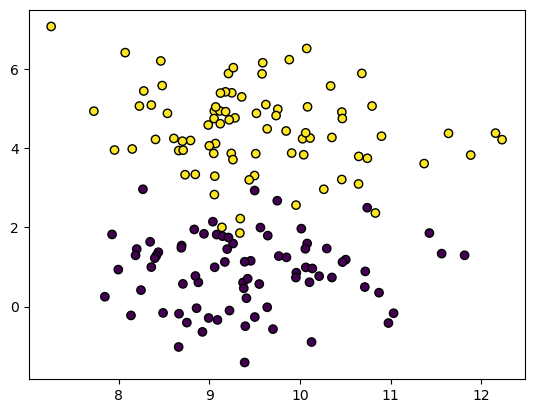

In [41]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,edgecolors='k')

In [42]:
x_train.shape

(160, 2)

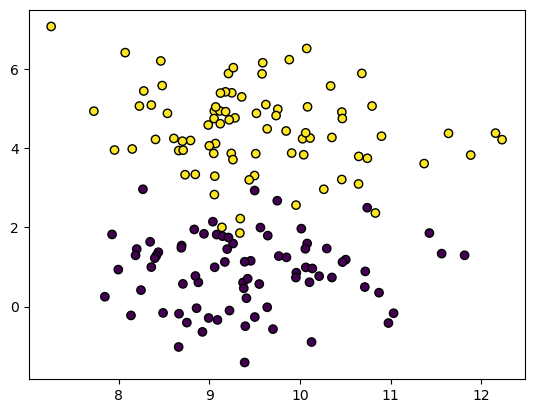

In [43]:
plt.scatter(x_train[:,0], x_train[:, 1], c=y_train, edgecolors='k')

In [44]:
x_train.shape

(160, 2)

In [45]:
y_test.shape

(40,)

In [46]:
y_test = y_test.reshape((y_test.shape[0], 1))

In [47]:
y_test.shape

(40, 1)

In [48]:
# Matrice X
X_train=np.hstack((x_train,np.ones((x_train.shape[0],1))))
X_test=np.hstack((x_test,np.ones((x_test.shape[0],1))))

In [49]:
theta, cost_history = gradient_descent(X_train,y_train,0.0001,100000)

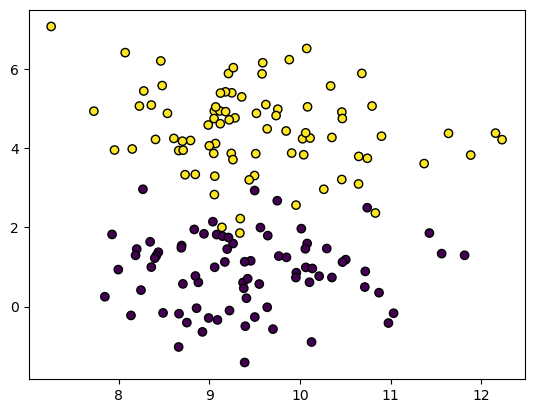

In [50]:
plt.scatter(X_train[:,0],X_train[:,1],c = y_train, edgecolors='k')

In [51]:
pred = model(X_train,theta)>=0.5

In [52]:
accuracy_score(y_train,pred)

0.95

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,pred)

0.95

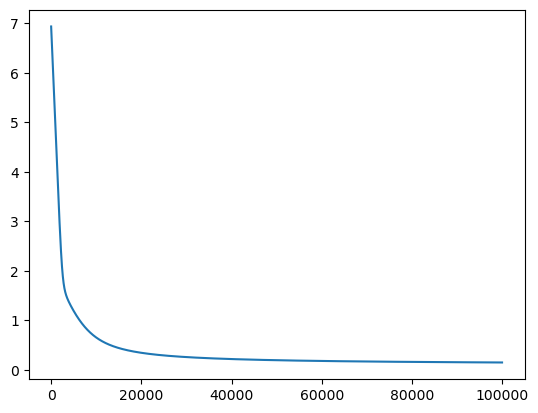

In [54]:
plt.plot(range(len(cost_history)),cost_history)

In [55]:
pred_test = model(X_test,theta)>=0.5

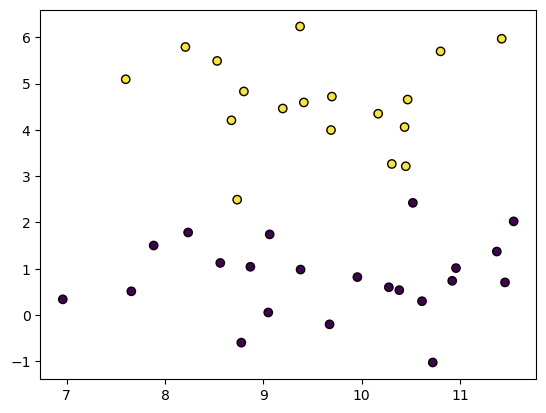

In [56]:
plt.scatter(X_test[:,0],X_test[:,1],c = pred_test, edgecolors='k')

In [57]:
accuracy_score(y_test,pred_test)

0.95